# Исследование данных об играх

Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

Цель проекта - выявить определяющие успешность игры закономерности.
Этапы:
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

###  Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#узнаем размер таблицы
print('Размер таблицы:', df.shape)

Размер таблицы: (16715, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Во многих столбцах присутствуют пропуски. Тип данных Year_of_Release и User_Score является некорректным.

Посчитаем количество пропусков в %.

In [6]:
for col in df.columns:  
    pct_missing = np.mean(df[col].isna())  
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

Name - 0.012%
Platform - 0.0%
Year_of_Release - 1.609%
Genre - 0.012%
NA_sales - 0.0%
EU_sales - 0.0%
JP_sales - 0.0%
Other_sales - 0.0%
Critic_Score - 51.319%
User_Score - 40.09%
Rating - 40.479%


In [7]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


__Вывод.__ 
Датасет состоит из 16715 строк и 11 столбцов. Названия столбцов написаны с заглавных букв, заменим их на прописные.
Во многих столбцах присутствуют пропуски. 
На следующем этапе займемся обработкой пропусков,где возможно, изменим типы данных, где он является некорректным (в столбцах Year_of_Release и User_Score).
Явных дубликатов нет, исследуем неявные.

### Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [8]:
df.columns = df.columns.str.lower()

Проверим количество пропусков в %.

In [9]:
pd.DataFrame(round(df.isna().mean()*100,3)).style.background_gradient('coolwarm')

,0
name,0.012000
platform,0.000000
year_of_release,1.609000
genre,0.012000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319000
user_score,40.090000


Пропуски в столбце name могли возникнуть из-за технической ошибки, отсутсвия данных, человеческого фактора. Пропуски в столбце year_of_release могли появиться из-за того, что создатель базы данных не нашел год выпуска игры. Если бы пропусков было единичное количество, можно было бы поискать эти данные самостоятельно и заполнить.
Пропуски critic_score, user_score могли возникнуть из-за отсутствия оценок на платформе, пропуски в стообце rating - из-за того, что рейтинг не был присвоен. 

Изучим строки с пропусками в столбце name.

In [10]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти пропуски можно удалить, т.к. составляют всего 0.012% и данные не являюся актуальными. В столбце year_of_release пропусков меньше 2%, поэтому можем так же удалить эти строки.

In [11]:
df = df.dropna(subset = ['name', 'year_of_release'])

В столбцах critic_score, user_score, rating слишком большой % пропусков, их удалять нельзя. 

In [12]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [13]:
df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

Пропуски в столбцах сritic_score и user_score обработывать не будем т.к. замена на медиану будет искажать результаты анализа из-за их большой доли.

In [14]:
display(df['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски в столбце rating значениями 'unknown'.

In [15]:
df['rating'] = df['rating'].fillna('unknown')

Изменим тип данных в столбце year_of_release на int, т.к. год не может быть вещественным числом

In [16]:
df['year_of_release'] = np.floor(pd.to_numeric(df['year_of_release'], errors='coerce')).astype('Int64')

Изучим уникальные значения в столбце critic_score.

In [17]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Изучим уникальные значения user_score.

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди оценок пользователей есть значение 'tbd'- рейтинг ещё не известен, то есть эти значения фактически являются пропусками. Заменим tbd на nan и приведем значения в user_score к типу float.

In [19]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Проверим наличие неявных дубликатов.

In [20]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Возможно, в этих строках содержатся данные об одних и тех же играх, но версиях для разных регионах(например, на разных языках). По игре Madden NFL 13 можно объединить данные, суммировав продажи по регионам. Игры с неизвестными названиями могут быть действительно разными, поэтому оставим строки с индексами 659 и 14244 без изменений.

In [21]:
df.loc[604, 'eu_sales'] = df.loc[604, 'eu_sales'] + df.loc[16230, 'eu_sales']

Добавим новый столбец с суммарными продажами во всех регионах.

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

__Вывод.__ Изучив данные, изменили названия столбцов, привели к нужному типу, обработали пропуски, где это было возможно, обработали неявные дубликаты, а так же добавили столбец с суммарными продажами. С этими данными можно приступать к исследовательскому анализу данных.

###  Исследовательский анализ данных

Изучим динамику количества выпущенных игр.

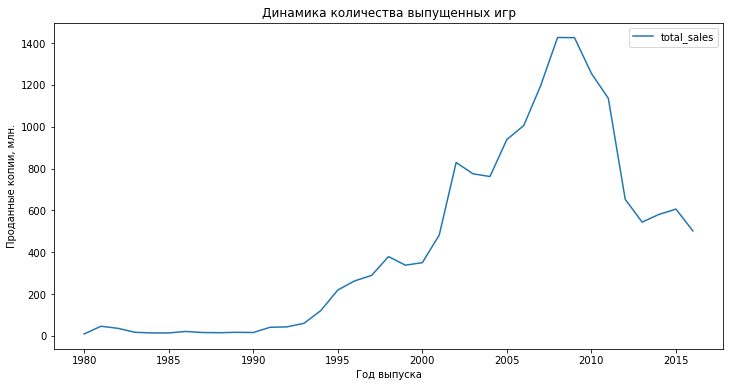

In [23]:
plt.rcParams['figure.figsize']=(12,6)
df.pivot_table(
    index = 'year_of_release', values='total_sales', aggfunc='count')\
    .plot(title='Динамика количества выпущенных игр');
df['year_of_release'].value_counts()
plt.xlabel('Год выпуска')
plt.ylabel('Проданные копии, млн.');

До 1993 г. выпускалось до 100 игр в год и до 2000 г. оставалось небольшим, затем до 2008 г. наблюдалось резкое увеличение выпусков, затем до 2016 г.такое же резкое снижение. Актуальными можно считать данные с 2001 г.

Изучим распределение суммарных продаж по платформам и выделим топ-6 платформ.

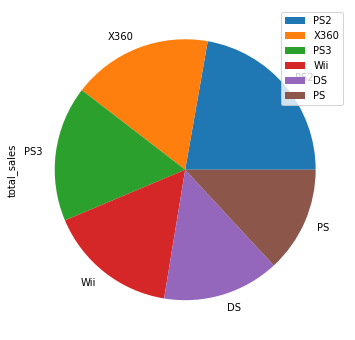

In [24]:
top_platforms = df.pivot_table(
    index = 'platform', values ='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending = False)\
    .head(6)
top_platforms.plot(y= 'total_sales', kind='pie');

In [25]:
#создадим список из платформ с наибольшими продажами
list_platforms = top_platforms.index.to_list()
list_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

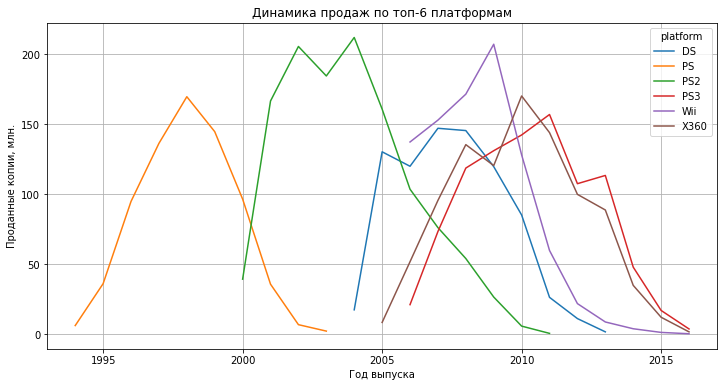

In [26]:
#сделаем срез данных по платформам из списка топ-6
top_6 = df.query('platform in @list_platforms')

top_6.pivot_table(
    index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(title='Динамика продаж по топ-6 платформам', grid=True, figsize=(12,6), xlim=(1993,2017))
plt.xlabel('Год выпуска')
plt.ylabel('Проданные копии, млн.');

Как видно на графике, в платформы существуют около 10 лет, но период с высокими продажами около 7 лет. В связи с динамичностью сферы для дальнейшего исследования возьмем данные за последние 3 года (с 2014 г.), чтобы анализировать достаточный объём выборки по актуальныи платформам.

Изучим динамику продаж по платформам с 2014 г.

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


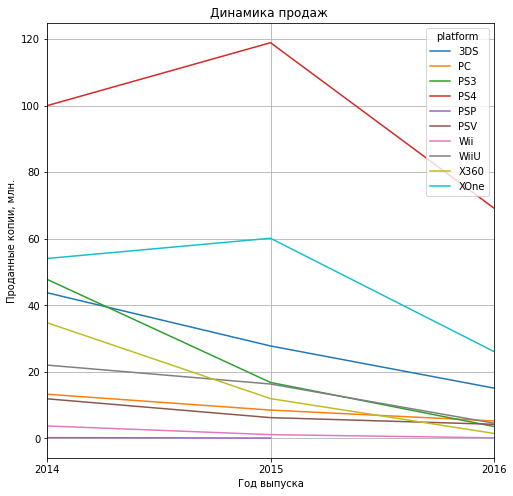

In [27]:
df_since2014 = df[df['year_of_release']>=2014]
platforms_total_sales_since2014 = df_since2014.pivot_table(
    index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platforms_total_sales_since2014.plot(title='Динамика продаж ', grid=True, figsize=(8,8), xlim=(2014,2016))
plt.xlabel('Год выпуска')
plt.ylabel('Проданные копии, млн.')
plt.xticks(np.arange(2014, 2017, step=1))
platforms_total_sales_since2014

Лидеры по продажам - PS4, XOne. По ним наблюдался рост продаж 2014-2015 гг., снижение в 2016 г.  возможно из-за неполноты данных. По остальным платформам наблюдается снижение продаж за весь анализируемый период. Резкое падение по платформам PS3 и X360 можно объяснить выходом новых версий платформ. Потенциальными можно назвать в первую очередь PS4, XOne, во вторую - 3DS, затем PC.

Построим диаграммы размаха по продажам игр в разбивке по платформам.

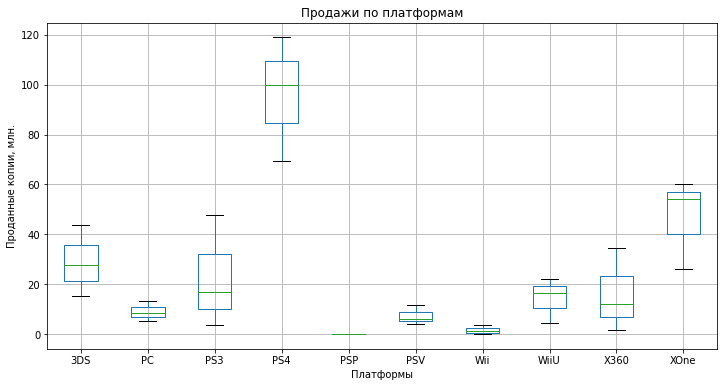

In [28]:
platforms_total_sales_since2014.boxplot(figsize=(12,6));
plt.title('Продажи по платформам');
plt.xlabel('Платформы')
plt.ylabel('Проданные копии, млн.');

Наибольшим потенциалом с большим отрывом обладают игры на платформе PS4, затем XOne, 3DS. Интересно, что на PS3 тоже есть спрос. Видимо, некоторые пользуются ещё старой версией платформы.

Проанализируем данные по одной платформе PS4.

In [29]:
ps4 = df_since2014[df_since2014['platform']=='PS4']

Рассмотрим влияние оценок критиков на продажи игр на платформе PS4, построив диаграмму рассеивания.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


0.403

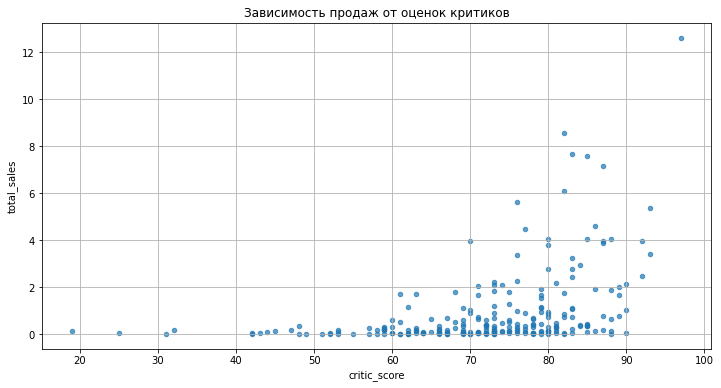

In [30]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость продаж от оценок критиков',\
        alpha=0.7, grid=True, figsize=(12,6));
display(ps4[ps4['total_sales']>10])
ps4['total_sales'].corr(ps4['critic_score']).round(3)

Прямой зависимости между продажами и оценками критиков не наблюдается, но больше всего продаж игр с высокими оценками и у игры с максимальной оценкой критиков Grand Theft Auto V максимальные продажи, если не считать игру Call of Duty: Black Ops 3 без оценки. Коэффициент корреляции 0.4 говорит о небольшом влиянии оценок критиков на продажи игр.

Рассмотрим влияние оценок пользователей на продажи игр на платформе PS4, построив диаграмму рассеивания.

-0.04

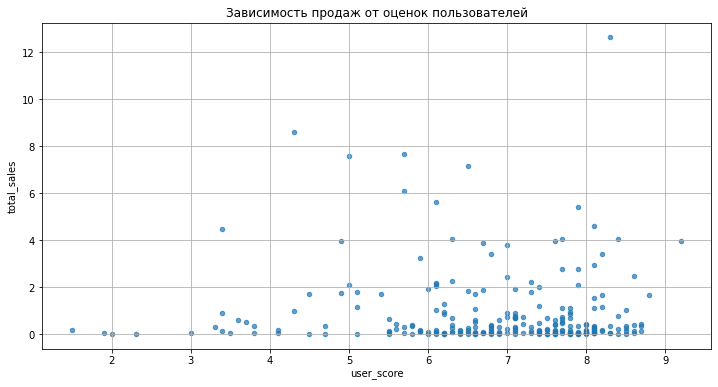

In [31]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='Зависимость продаж от оценок пользователей',\
         alpha=0.7, grid=True, figsize=(12,6))
ps4['total_sales'].corr(ps4['user_score']).round(3)

Оценки пользователей и продажи не имеют линейной связи друг с другом.

Построим гистограмму с распределением количества игр по жанрам.

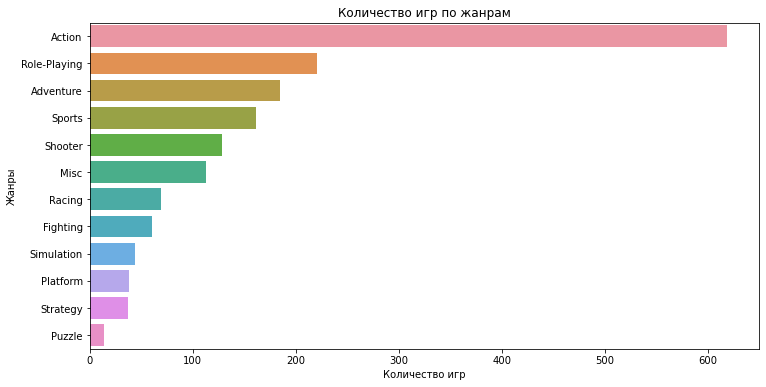

In [32]:
genre = df_since2014['genre'].value_counts().reset_index()
a = sns.barplot(x='genre', y='index', data=genre)
plt.rcParams['figure.figsize']=(12,6)
a.set_title('Количество игр по жанрам');
a.set_xlabel('Количество игр')
a.set_ylabel('Жанры');

Больше всего игр выпускается в жанрах action и sports, меньше всего - strategy и puzzle.

Построим гистограмму с распределением количества игр по жанрам.

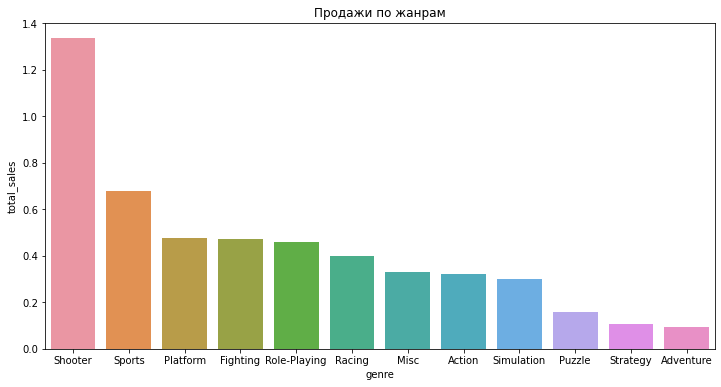

In [33]:
genre_total_sales_since2014 = df_since2014.pivot_table(
    index = 'genre', values='total_sales').reset_index()
b = genre_total_sales_since2014.sort_values(by='total_sales', ascending=False)
b = sns.barplot(x= 'genre', y = 'total_sales', data = b)
plt.rcParams['figure.figsize']=(12,6)
b.set_title('Продажи по жанрам');

Самыми прибыльными являются игры в жанре Shooter, почти вдвое меньший средний доход приносят игры в жанре Sports, наименьший - Puzzle, Strategy, Adventure. Интересно, что доход не соответствует количеству выпущенных игр.

__Вывод.__ Исследование показало, что наиболее перспективными являются в первую очередь платформы PS4, XOne, во вторую - 3DS, затем PC. Оценки пользователей, критиков и продажи не имеют линейной связи друг с другом. Наибольший доход могут принести игры в жанрах Shooter, Sports.

###  Составление портрета пользователя каждого региона

Изучим доли продаж по топ-5 платформам в разрезе регионов: Северная Америка, Европа, Япония.

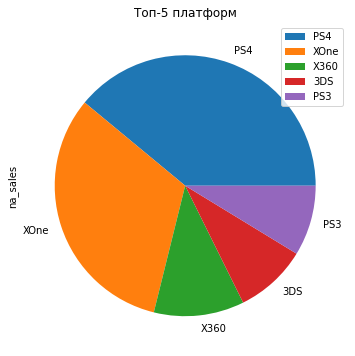

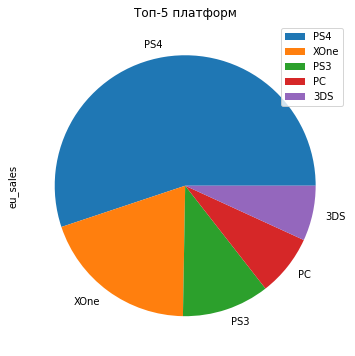

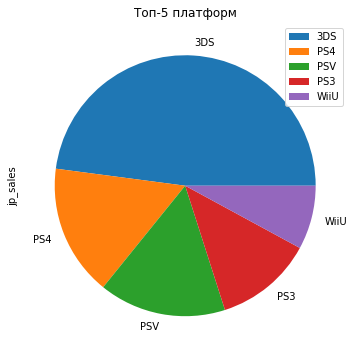

In [34]:
col = ['na_sales', 'eu_sales', 'jp_sales'] 

for i in col:
    name_pie = df_since2014.pivot_table(
    index = 'platform', values=i, aggfunc = 'sum')\
    .sort_values(by=i, ascending = False)\
    .head(5)\
    .plot(y= i, kind='pie')
    name_pie.set_title('Топ-5 платформ');

В Америке и Европе лидирует платформа PS4, т.к. большинство американских и европейских игр выпускаются на этой платформе. В Японии PS4 также популярна из-за наличия локальных игр и для Японии. 
Xbox популярна больше в Америке, т.к. это местная компания, не ориентированная на японский рынок.
В Европе больше пользуются PC, чем в других регионах.
В Японии самая популярная платформа - 3DS(Nintendo), т.к. учитывает особенности местной культуры и выпускает много эксклюзивных японских игр.
Таким образом, приоритетные платформы для Америки и Европы - PS4 и Xbox, для Японии - Nintendo и PS4.

Выделим топ-5 жанров в разрезе регионов: Северная Америка, Европа, Япония.

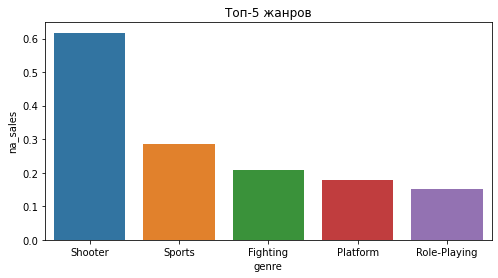

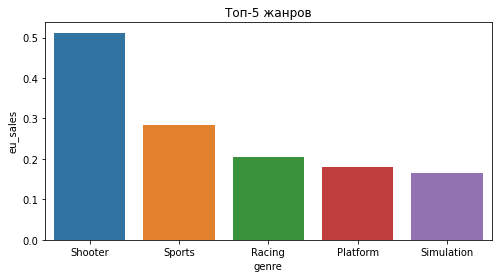

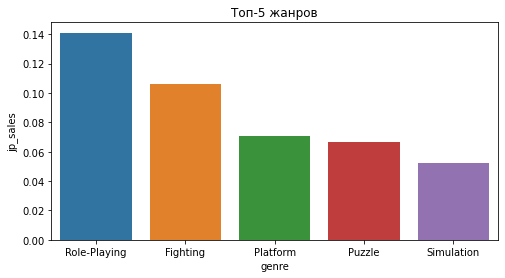

In [35]:
plt.rcParams['figure.figsize']=(8,4)
for i in col:
    name_barplot = sns.barplot(x='genre', y=i, data=df_since2014.pivot_table(
    index = 'genre', values=i)\
    .reset_index().sort_values(by=i, ascending=False).head())
    name_barplot.set_title('Топ-5 жанров');
    plt.show()

Жанровые предпочтения также зависят от региона. В топе во всех регионах встречаются Platform. 
В Америке и Европе больше предпочитают Shooter, Sports, в Японии - Role-Playing, Fighting.

Оценим зависимость продаж от рейтинга ESRB в разрезе регионов: Северная Америка, Европа, Япония.

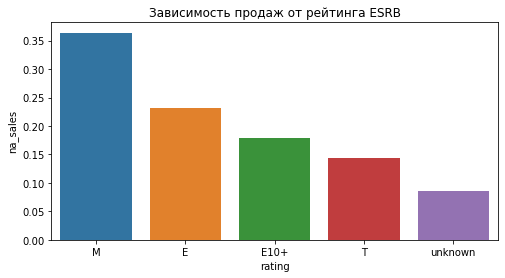

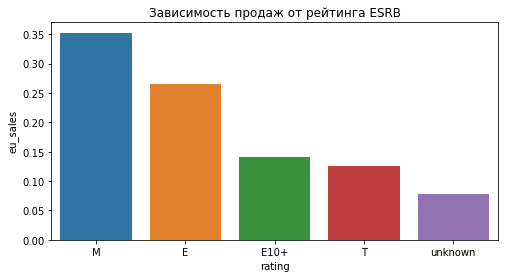

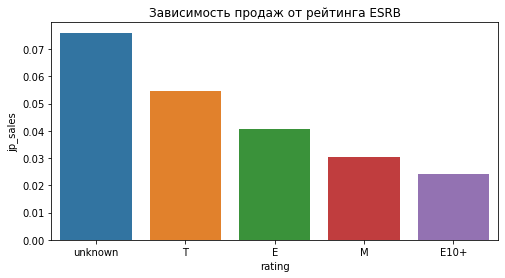

In [36]:
for i in col:
    name_barplot = sns.barplot(x='rating', y=i, data=df_since2014.pivot_table(
    index = 'rating', values=i)\
    .reset_index().sort_values(by=i, ascending=False))
    name_barplot.set_title('Зависимость продаж от рейтинга ESRB');
    plt.show()

В Америке и Европе больше всего предпочитают игры категории М - 17+, в Японии - игры, где категория ещё не определена. Думаю, это связано с тем, что японцы предпочитают локальные игры.

Изучив данные по регионам, можно сделать вывод, что предпочтения платформ и игр зависят от региона. Наиболее перспективными для Америки и Европы являются игры жанров Shooter и Sports категории М - 17+ для PS4 и Xbox, для Японии - локальные игры жанров Role-Playing и Fighting для Nintendo и PS4.

###  Проверка гипотез

Нулевую гипотезу будем формулировать как равенство показателей, альтернативную - как неравенство.
В качестве уровеня значимости возьмем стандартные 5%.

Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
```
H_0: средний пользовательский рейтинг платформы Xbox = средний пользовательский рейтинг PC
H_a: средний пользовательский рейтинг платформы Xbox ≠ средний пользовательский рейтинг PC
alpha = 0.05    
```

In [37]:
df_since2014_new = df_since2014.dropna(subset=['user_score'])

results = st.ttest_ind(
    df_since2014_new.loc[df_since2014_new.platform=='XOne', 'user_score'],
    df_since2014_new.loc[df_since2014_new.platform=='PC', 'user_score'],
    equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значит мы не можем отвергруть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.
```
H_0: средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports
H_a: средний пользовательский рейтинг жанра Action  ≠ средний пользовательский рейтинг PC
alpha = 0.05   
```

In [38]:
results = st.ttest_ind(
    df_since2014_new.loc[df_since2014_new.genre=='Action', 'user_score'],
    df_since2014_new.loc[df_since2014_new.genre=='Sports', 'user_score'],
    equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Значит можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

###  Общий вывод

Изучив данные, изменили названия столбцов, привели к нужному типу, обработали пропуски, где это было возможно, проверили на явные дубликаты, рассчитали дополнительные характеристики.
Исследовательский анализ позволил сделать следующие выводы.

На успешность игры в большей степени влияют:
* платформа, для которой выпускается игра;
* жанр игры;
* регион.

Оценки пользователей и критиков не имеют прямой линейной корреляции с продажами.

Наиболее перспективными являются в первую очередь платформы PS4, XOne, во вторую - 3DS, затем PC. 
Наибольший доход могут принести игры в жанрах Shooter, Sports.

Если рассмотреть данные в разрезе регионов, наиболее перспективными для Америки и Европы являются игры жанров Shooter и Sports категории М - 17+ для PS4 и Xbox, для Японии - локальные игры жанров Role-Playing и Fighting для Nintendo и PS4.